In [1]:
# 安裝twstock
!pip install twstock

You should consider upgrading via the '/anaconda3/anaconda3/bin/python -m pip install --upgrade pip' command.


In [11]:
# 匯入模組
import twstock
import time
import csv
import pandas as pd
import matplotlib.pyplot as plt

# time.sleep(secs)


Suspend execution of the calling thread for the given number of seconds. The argument may be a floating point number to indicate a more precise sleep time. The actual suspension time may be less than that requested because any caught signal will terminate the sleep() following execution of that signal’s catching routine. Also, the suspension time may be longer than requested by an arbitrary amount because of the scheduling of other activity in the system.

# 下方是讓不會改程式的使用者可以手動輸入股票代號與區間的程式

In [5]:
# 基本參數
stock_code = input('請輸入股票代號：') # 股票代號
start_year = int(input('請輸入起始年份：'))  # 起始年份，轉換型別成整數
start_month = int(input('請輸入起始月份：'))  # 起始月份，轉換型別成整數
finish_year = int(input('請輸入結束年份：')) # 結束年份，轉換型別成整數
finish_month = int(input('請輸入結束月份：'))  # 結束月份，轉換型別成整數
#檔案名稱
file_name = stock_code + "_" + str(start_year) + "_" + str(start_month) + "_" + str(finish_year) + "_" + str(finish_month)

請輸入股票代號：2330
請輸入起始年份：2020
請輸入起始月份：5
請輸入結束年份：2021
請輸入結束月份：3


# 下方是讓會看程式碼的使用者可以直接改變數的程式

In [15]:
# 基本參數
stock_code = "2330" # 股票代號
start_year = 2020 # 起始年份
start_month = 10  # 起始月份
finish_year = 2021 # 結束年份
finish_month = 2  # 結束月份
#檔案名稱
file_name = stock_code + "_" + str(start_year) + "_" + str(start_month) + "_" + str(finish_year) + "_" + str(finish_month)

In [16]:
# 初始化
stock = twstock.Stock(stock_code)
data_list = []

#透過 twstock API 抓取資料
for year in range(start_year, finish_year+1):   # 因python的特性for只會取到finish_year，但不取得finish_year本身，因此必須加上1
    for month in range(1, 13):

        if year == start_year and month < start_month: #避免抓取到起始月份之前的數據
            continue

        print(year, "年", month, "月  資料抓取中...")
        data_list.append(stock.fetch(year, month))  # 將抓到的資料匯入data_list
        #print(stock.fetch(year, month))#查看輸入的資料格式

        if year == finish_year and month == finish_month: # 若與結束年月符合則跳出for
            break

        time.sleep(15) # 避免被鎖IP，故意延長時間 
        
print("finish")

2020 年 10 月  資料抓取中...
2020 年 11 月  資料抓取中...
2020 年 12 月  資料抓取中...
2021 年 1 月  資料抓取中...
2021 年 2 月  資料抓取中...
finish


In [17]:
type(stock.fetch(year, month))#fetch函式用於取得(X年，X月)之股票資料

list

# fetch函式用法

stock.fetch(2015, 7)  # 獲取 2015 年 7 月之股票資料

stock.fetch(2010, 5)  # 獲取 2010 年 5 月之股票資料

stock.fetch_31()      # 獲取近 31 日開盤之股票資料

stock.fetch_from(2000, 10)  # 獲取 2000 年 10 月至今日之股票資料


In [18]:
#寫入CSV
with open(file_name + '.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # 寫入資料欄位
    writer.writerow(['date', 'open', 'close', 'high', 'low', 'capacity', 'change'])

    for data_list_month in data_list:
        for data in data_list_month:
            
            # 將"時間, 開盤, 收盤, 最高, 最低, 成交, 漲跌"寫入CSV檔
            writer.writerow([data[0].strftime( '%Y-%m-%d' ), data[3], data[6], data[4], data[5], data[1], data[7]])

In [19]:
# 第二部分，可分割

In [20]:
#自動產製csv檔案名稱，讓下方讀入csv資料部分可以不用手動輸入檔案名稱
csvfile_name=str(file_name)+".csv"
print(csvfile_name)

2330_2020_10_2021_2.csv


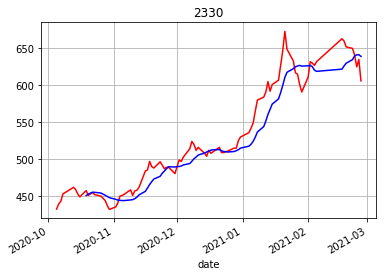

In [21]:
# 使用pandas 讀入 CSV資料
data = pd.read_csv(r'%s'%(csvfile_name))

# 將時間str型態轉換為dateFrame格式，並設為索引
data['date'] = pd.to_datetime(data['date'])
data.set_index("date", inplace=True)

# 使用收盤價繪製10日均線(自營主力控盤依據，如果呈是死叉可能代表主力跑走了)
mean = data['close'].rolling(10).mean()

#繪製每天的收盤價(紅色)以及均線(藍色)
data["close"].plot(color='red')
mean.plot(color='blue')
plt.title('%s'%(stock_code))#圖表標題
plt.grid(True)#用來顯示網格
plt.show()